In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

In [10]:
#Класс МОНОМОВ
class MON:
    def __init__(self, k):
        self.deg = k
    def val(self, x):
        return x**(self.deg)
    def  __mul__(self, other):
        return MON(self.deg + other.deg)

In [11]:
def myF(x):
    return (x**3 - x**2 + 10*x - 100) #np.sin(4*x) #np.exp(x)

In [12]:
def takeDATA(a, b, n):
    NODES = np.linspace(a, b, n+1)
    VALUES = [myF(x) for x in NODES]
    print("NODES: ", [x for x in NODES])
    print("VALUES: ", VALUES)

In [13]:
#Ведущий Элемент (находим ведущий(макс.) элемент подматрицы [strD,len(A)-1]x[stlD,len(A)-1], переставляем на место (strD, stlD))
def leadE(A, B, IND, strD, stlD):
    maxE = A[strD][stlD]
    strE = strD
    stlE = stlD
    for i in range(strD, len(A)):
        for j in range(stlD, len(A[i])):
            if maxE < A[i][j]: 
                maxE = A[i][j]
                strE = i
                stlE = j
    for i in range(len(A)):
        A[i][stlE], A[i][stlD] = A[i][stlD], A[i][stlE]
    IND[stlD], IND[stlE] = IND[stlE], IND[stlD] #перестановка индексов неизвестных вместе со столб-и матрицы системы A 
    
    for j in range(len(A[strE])):
        A[strD][j], A[strE][j] = A[strE][j], A[strD][j]
    B[strD], B[strE] = B[strE], B[strD]
    return A, B, IND

#Метод ГАУССА
def MG(A, B):
    IND = [i for i in range(len(A))] #индексы неизвестных
    X = [0 for i in range(len(A))]
    #Прямой ход
    for j in range(0, len(A)-1):
        A, B, IND = leadE(A, B, IND, j, j)
        for i in range(j+1, len(A)):
            r = -(A[i][j]/A[j][j])
            for k in range(j, len(A)):
                A[i][k] = A[i][k] + r*A[j][k]
            B[i] = B[i] + r*B[j]
    #Обратный ход
    for i in range(len(A)-1, -1, -1):
        Sum = 0
        for j in range(i+1, len(A)):
            Sum += A[i][j]*X[IND[j]]
        X[IND[i]] = (B[i] - Sum)/A[i][i]
    return X

In [16]:
#Метод НАИМЕНЬШИХ КВАДРАТОВ
def LSM(a, b, n, NODES, VALUES, k):
    A = [[0 for i in range(k+1)] for j in range(k+1)]
    B = [0 for i in range(k+1)]
    
    #-----ПОСТРОЕНИЕ-МАТРИЦЫ-СИСТЕМЫ----------------------------------------------
    #for i in range(k+1):
    #    phii = MON(i)
    #    for j in range(k+1):
    #        phij = MON(j)
    #        phi = phii * phij
    #        A[i][j] = integrate.quad(phi.val, a, b)[0]
    
    for i in range(k+1):
        for j in range(k+1):
            Sum = 0
            for node in NODES:
                Sum += node**(i+j)
            A[i][j] = Sum        
    
    for i in range(k+1):
        Sum = 0
        phi = MON(i)
        for j in range(n+1):
            Sum += VALUES[j]*phi.val(NODES[j])
        B[i] = Sum
    
    print("A: ")
    print(pd.DataFrame(A), "\n")
    print("B: ")
    print(pd.DataFrame(B), "\n")
    
    #-----РЕШЕНИЕ-СИСТЕМЫ---------------------------------------------------------
    COEF = MG(A, B)
    print("COEFFICIENTS: ")
    print(pd.DataFrame(COEF), "\n")
    
    #-----СРЕДНЕКВАДРАТИЧНОЕ-ОТКЛОНЕНИЕ-------------------------------------------
    Sum = 0
    for i in range(n+1):
        val = 0
        for j in range(k+1):
            val += COEF[j]*(NODES[i]**j)
        Sum += ((val - VALUES[i])**2)/(n+1)        
    
    standDev = np.sqrt(Sum)
    print("Standard Deviation: ", standDev)
    
    #-----ПОСТРОЕНИЕ-ГРАФИКА------------------------------------------------------
    fX = np.linspace(a, b, 100)
    fY = [myF(x) for x in fX]
    
    lsmX = np.linspace(a, b, 100)
    lsmY = []
    
    for x in lsmX:
        y = 0
        for j in range(k+1):
            y += COEF[j]*(x**j)
        lsmY.append(y)
    
    up = max(max(lsmY), max(fY)) + 1
    down = min(min(lsmY), min(fY)) - 1
     
    plt.plot(fX, fY, "blue", label = "$myF$")
    plt.plot(lsmX, lsmY, "red", label = "$LSM$")
    plt.plot(NODES, VALUES, "o", label = "$DATA$")
    plt.grid(True)
    plt.axis([a, b, down, up])
    plt.legend()
    plt.show()

A: 
      0      1      2
0   6.0   15.0   55.0
1  15.0   55.0  225.0
2  55.0  225.0  979.0 

B: 
       0
0 -280.0
1 -196.0
2  196.0 

COEFFICIENTS: 
      0
0 -97.0
1  -3.7
2   6.5 

Standard Deviation:  3.28633534503


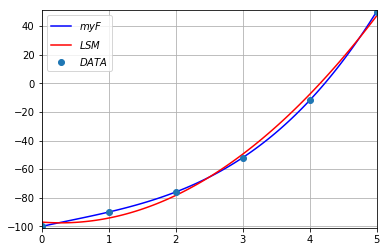

In [17]:
#f(x) = (x^3 - x^2 + 10*x - 100)
LSM(0, 5, 5, 
    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0], 
    [-100, -90, -76, -52, -12, 50], 2)

In [15]:
takeDATA(0, 5, 5)

NODES:  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
VALUES:  [-100.0, -90.0, -76.0, -52.0, -12.0, 50.0]
